In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

corners = []

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x, y])
        cv.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv.imshow('image', img)
        
        if len(corners) == 4:
            cv.destroyAllWindows()

img = cv.imread('indoor-led-screen-stadiums.jpg')
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)

cv.waitKey(0)

print(corners)

[[447, 232], [942, 199], [962, 523], [448, 523]]


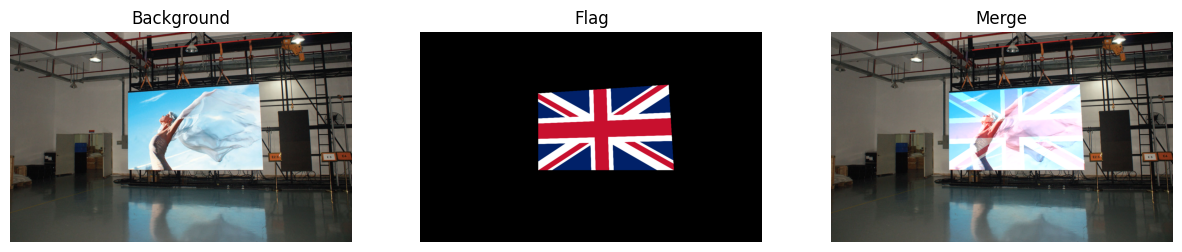

In [4]:
flag = cv.imread('flag_image.png')
img2 = cv.imread('indoor-led-screen-stadiums.jpg')
cv.imshow('image', img)

rows, cols, ch = flag.shape
pts1 = np.float32(corners)
pts2 = np.float32([[0, 0], [cols, 0], [cols, rows], [0, rows]])

h = cv.findHomography(pts2, pts1)[0]
warped_flag = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))
result = cv.addWeighted(img2, 1, warped_flag, 0.4, 0, dst=img)

warped_flag = cv.cvtColor(warped_flag, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1, 3, figsize=(15, 8))


ax[0].imshow(img2),ax[0].set_title('Background'),ax[0].axis('off')
ax[1].imshow(warped_flag),ax[1].set_title('Flag'),ax[1].axis('off')
ax[2].imshow(result),ax[2].set_title('Merge'),ax[2].axis('off')

plt.show()

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

corners = []

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x, y])
        cv.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv.imshow('image', img)
        
        if len(corners) == 4:
            cv.destroyAllWindows()

img = cv.imread('istockphoto-1307272533-612x612.jpg')
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)

cv.waitKey(0)

print(corners)

[[136, 143], [435, 139], [441, 306], [133, 309]]


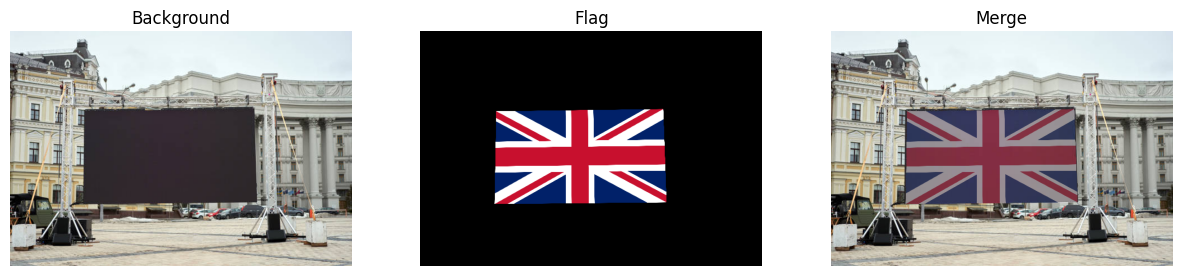

: 

In [6]:
flag = cv.imread('flag_image.png')
img2 = cv.imread('istockphoto-1307272533-612x612.jpg')
cv.imshow('image', img)

rows, cols, ch = flag.shape
pts1 = np.float32(corners)
pts2 = np.float32([[0, 0], [cols, 0], [cols, rows], [0, rows]])

h = cv.findHomography(pts2, pts1)[0]
warped_flag = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))
result = cv.addWeighted(img2, 1, warped_flag, 0.4, 0, dst=img)

warped_flag = cv.cvtColor(warped_flag, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1, 3, figsize=(15, 8))


ax[0].imshow(img2),ax[0].set_title('Background'),ax[0].axis('off')
ax[1].imshow(warped_flag),ax[1].set_title('Flag'),ax[1].axis('off')
ax[2].imshow(result),ax[2].set_title('Merge'),ax[2].axis('off')

plt.show()

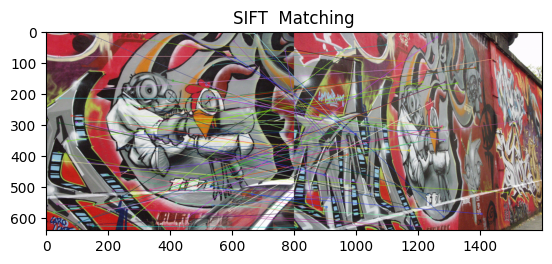

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_and_visualize_sift(img1_path, img2_path, ratio_threshold=0.75):
    # Load images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None or img2 is None:
        raise ValueError("One or both image files do not exist.")

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect and compute keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match features using a Brute-Force Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < ratio_threshold * n.distance:
            good_matches.append(m)

    # Visualize the matched keypoints
    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

    plt.imshow(img3)
    plt.title('SIFT  Matching')
    plt.show()

# Example usage:
match_and_visualize_sift('img1.ppm', 'img5.ppm')


In [10]:
import cv2 as cv
import numpy as np

# Load images and convert to grayscale
img_files = ["img1.ppm", "img2.ppm", "img3.ppm", "img4.ppm", "img5.ppm"]
ims = [cv.cvtColor(cv.imread(img_file), cv.COLOR_BGR2GRAY) for img_file in img_files]

def random_num(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)):
        m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m):
        return l
    else:
        return random_num(n,t)

def Homography(p1, p2):
    x1, y1, x2, y2, x3, y3, x4, y4 = p2[0], p2[1], p2[2], p2[3], p2[4], p2[5], p2[6], p2[7] 
    x1T, x2T, x3T, x4T = p1[0], p1[1], p1[2], p1[3]
    zero_matrix = np.array([[0], [0], [0]])

    matrix_A = np.concatenate((np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis = 1), np.concatenate((x1T, zero_matrix.T, -x1*x1T), axis = 1),
                            np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis = 1), np.concatenate((x2T, zero_matrix.T, -x2*x2T), axis = 1),
                            np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis = 1), np.concatenate((x3T, zero_matrix.T, -x3*x3T), axis = 1),
                            np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis = 1), np.concatenate((x4T, zero_matrix.T, -x4*x4T), axis = 1)), axis = 0)
    W, v = np.linalg.eig(((matrix_A.T)@matrix_A))
    temph= v[:,np.argmin(W)]
    H = temph.reshape((3,3))
    return H

p, s, e= 0.999, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
Ht = []
for i in range(4):
    sift = cv.SIFT_create()
    kp_1, des_1 = sift.detectAndCompute(ims[i],None)
    kp_2, des_2 = sift.detectAndCompute(ims[i+1],None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  
    matches = sorted(bf_match.match(des_1, des_2), key = lambda x:x.distance)
    Src_Points = [kp_1[k.queryIdx].pt for k in matches]
    Dest_Points = [kp_2[k.trainIdx].pt for k in matches]
    threshold, best_inliers, best_H = 2, 0, 0

    for i in range(N):
        ran_points = random_num(len(Src_Points)-1, 4)
        f_points = []
        for j in range(4):
            f_points.append(np.array([[Src_Points[ran_points[j]][0], Src_Points[ran_points[j]][1], 1]]))
        t_points = []
        for j in range(4):
            t_points.append(Dest_Points[ran_points[j]][0]) 
            t_points.append(Dest_Points[ran_points[j]][1])

        H = Homography(f_points,t_points)
        inliers = 0 
        for k in range(len(Src_Points)):
            X = [Src_Points[k][0], Src_Points[k][1], 1]
            HX = H @ X
            HX /= HX[-1]
            err = np.sqrt(np.power(HX[0]-Dest_Points[k][0], 2) + np.power(HX[1]-Dest_Points[k][1], 2))
            if err < threshold:
                inliers +=1
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H 
    Ht.append(best_H)
H_final= Ht[-1]
for h in reversed(Ht[:-1]):
    H_final= h @ H_final
H_final /= H_final[-1][-1]

print("Computed Homography = ", H_final)


Computed Homography =  [[ 6.43250624e-01  1.66433681e-01  1.45816717e+02]
 [ 3.72016751e-01  9.11882069e-01 -3.48447513e+01]
 [ 3.92396708e-04 -1.02132214e-04  1.00000000e+00]]


In [17]:
from random import randint
img2, img3, img4, img1, img5 = cv.imread("img2.ppm"), cv.imread("img3.ppm"), cv.imread("img4.ppm"), cv.imread("img1.ppm"), cv.imread("img5.ppm")
im1, im5, im2, im3, im4 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY), cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.cvtColor(img3, cv.COLOR_BGR2GRAY), cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

ims = [im1, im2, im3, im4, im5]

def random_num(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)):
        m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m):
        return l
    else:
        return random_num(n,t)

def Homography(p1, p2):
    x1, y1, x2, y2, x3, y3, x4, y4 = p2[0], p2[1], p2[2], p2[3], p2[4], p2[5], p2[6], p2[7] 
    x1T, x2T, x3T, x4T = p1[0], p1[1], p1[2], p1[3]
    zero_matrix = np.array([[0], [0], [0]])

    matrix_A = np.concatenate((np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis = 1), np.concatenate((x1T, zero_matrix.T, -x1*x1T), axis = 1),
                            np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis = 1), np.concatenate((x2T, zero_matrix.T, -x2*x2T), axis = 1),
                            np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis = 1), np.concatenate((x3T, zero_matrix.T, -x3*x3T), axis = 1),
                            np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis = 1), np.concatenate((x4T, zero_matrix.T, -x4*x4T), axis = 1)), axis = 0, dtype=np.float64)
    W, v = np.linalg.eig(((matrix_A.T)@matrix_A))
    temph= v[:,np.argmin(W)]
    H = temph.reshape((3,3))
    return H

p, s, e= 0.999, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
Ht = []


# Assuming you have defined the random_num function and Homography function

N = 100  # Number of iterations for RANSAC
threshold = 2

i = 0  # Initialize the index variable
Ht = []

while i < 4:  # Replace 3 with the appropriate range limit
    sift = cv.SIFT_create()
    kp_1, des_1 = sift.detectAndCompute(ims[i], None)
    kp_2, des_2 = sift.detectAndCompute(ims[i + 1], None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = sorted(bf_match.match(des_1, des_2), key=lambda x: x.distance)
    Src_Points = [kp_1[k.queryIdx].pt for k in matches]
    Dest_Points = [kp_2[k.trainIdx].pt for k in matches]

    best_inliers = 0
    best_H = 0

    j = 0  # Initialize another index variable for the RANSAC loop
    while j < N:
        ran_points = random_num(len(Src_Points) - 1, 4)
        f_points = []
        for k in range(4):
            f_points.append(np.array([[Src_Points[ran_points[k]][0], Src_Points[ran_points[k]][1], 1]]))
        t_points = []
        for k in range(4):
            t_points.append(Dest_Points[ran_points[k]][0])
            t_points.append(Dest_Points[ran_points[k]][1])

        H = Homography(f_points, t_points)
        inliers = 0

        for k in range(len(Src_Points)):
            X = [Src_Points[k][0], Src_Points[k][1], 1]
            HX = H @ X
            HX /= HX[-1]
            err = np.sqrt(np.power(HX[0] - Dest_Points[k][0], 2) + np.power(HX[1] - Dest_Points[k][1], 2))
            if err < threshold:
                inliers += 1

        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H

        j += 1  # Increment the RANSAC loop index

    Ht.append(best_H)
    i += 1  # Increment the main loop index


H1_H5 = Ht[3] @ Ht[2] @ Ht[1] @ Ht[0]
H1_H5 /= H1_H5[-1][-1]

print("Computed Homography = ", H1_H5)



Computed Homography =  [[ 6.47188569e-01  6.73758862e-02  2.19329970e+02]
 [ 2.35756841e-01  1.17454247e+00 -2.77458119e+01]
 [ 5.27642578e-04 -4.05599415e-05  1.00000000e+00]]


In [21]:
final_img=cv.imread('img1.ppm')
final_img = cv.warpPerspective(final_img, H1_H5, dsize=(img1.shape[1], img1.shape[0]+100))

transformed_img_1 = np.copy(final_img)

for i in range(final_img.shape[0]):
    for j in range(final_img.shape[1]):
        if np.all(final_img[i,j] == 0) and i < img5.shape[0] and j < img5.shape[1]:
            final_img[i,j] = img5[i,j]




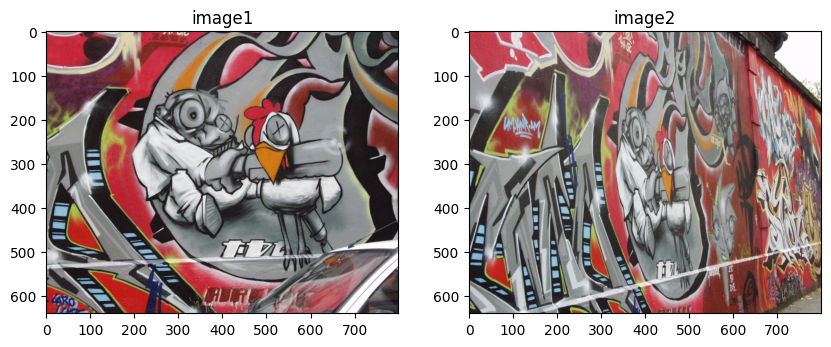

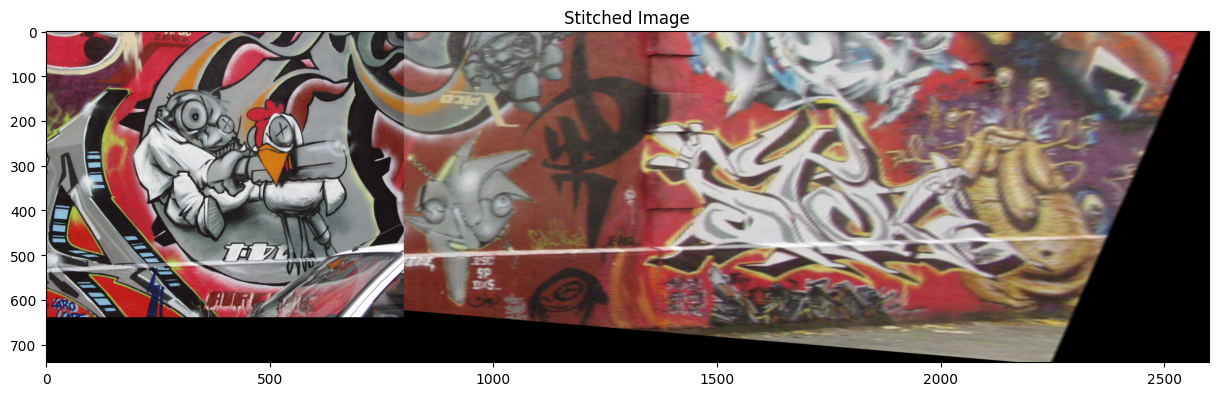

In [22]:
img1 = cv.imread(r'img1.ppm',cv.IMREAD_ANYCOLOR)
img5 = cv.imread(r'img5.ppm',cv.IMREAD_ANYCOLOR)

width = img5.shape[1] + img1.shape[1]+1000
height = img1.shape[0]+100
H = H1_H5 
result = cv.warpPerspective(img5, np.linalg.inv(H),(width, height),flags = cv.INTER_LINEAR + cv.BORDER_CONSTANT)
result[0:img1.shape[0], 0:img1.shape[1]] = img1

fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].set_title('image1')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))

ax[1].set_title('image2')
ax[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.set_title('Stitched final Image')
ax.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

corners = []

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x, y])
        cv.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv.imshow('image', img)
        
        if len(corners) == 4:
            cv.destroyAllWindows()

img = cv.imread('prasads.jpg')
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)

cv.waitKey(0)

print(corners)

[[281, 178], [885, 151], [855, 519], [324, 507]]


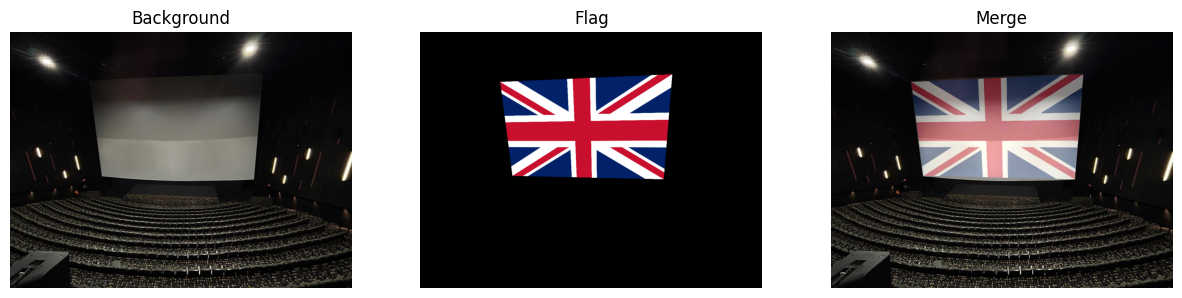

In [24]:
flag = cv.imread('flag_image.png')
img2 = cv.imread('prasads.jpg')
cv.imshow('image', img)

rows, cols, ch = flag.shape
pts1 = np.float32(corners)
pts2 = np.float32([[0, 0], [cols, 0], [cols, rows], [0, rows]])

h = cv.findHomography(pts2, pts1)[0]
warped_flag = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))
result = cv.addWeighted(img2, 1, warped_flag, 0.4, 0, dst=img)

warped_flag = cv.cvtColor(warped_flag, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1, 3, figsize=(15, 8))


ax[0].imshow(img2),ax[0].set_title('Background'),ax[0].axis('off')
ax[1].imshow(warped_flag),ax[1].set_title('Flag'),ax[1].axis('off')
ax[2].imshow(result),ax[2].set_title('Merge'),ax[2].axis('off')

plt.show()